<a href="https://colab.research.google.com/github/Tiabet/NLP/blob/master/Text_mining_Preprocessing%26Topic_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#한국어 전처리 기타

## 한국어 띄어쓰기

In [ ]:
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git

In [ ]:
from pykospacing import Spacing
spacing = Spacing()

In [ ]:
spacing("1987의네이버영화정보네티즌10점평에서언급된단어들을지난해12월27일부터올해1월10일까지파이썬과KoNLPy패키지로텍스트마이닝하여분석했다.")

'1987의 네이버 영화 정보 네티즌 10점 평에서 언급된 단어들을 지난해 12월 27일부터 올해 1월 10일까지 파이썬과 KoNLP y 패키지로 텍스트마이닝하여 분석했다.'

In [ ]:
spacing = Spacing(rules=['KoNLPy'])

In [ ]:
spacing("1987의네이버영화정보네티즌10점평에서언급된단어들을지난해12월27일부터올해1월10일까지통계프로그램R과KoNLPy패키지로텍스트마이닝하여분석했다.")

'1987의 네이버 영화 정보 네티즌 10점 평에서 언급된 단어들을 지난해 12월 27일부터 올해 1월 10일까지 통계 프로그램 R과 KoNLPy 패키지로 텍스트마이닝하여 분석했다.'

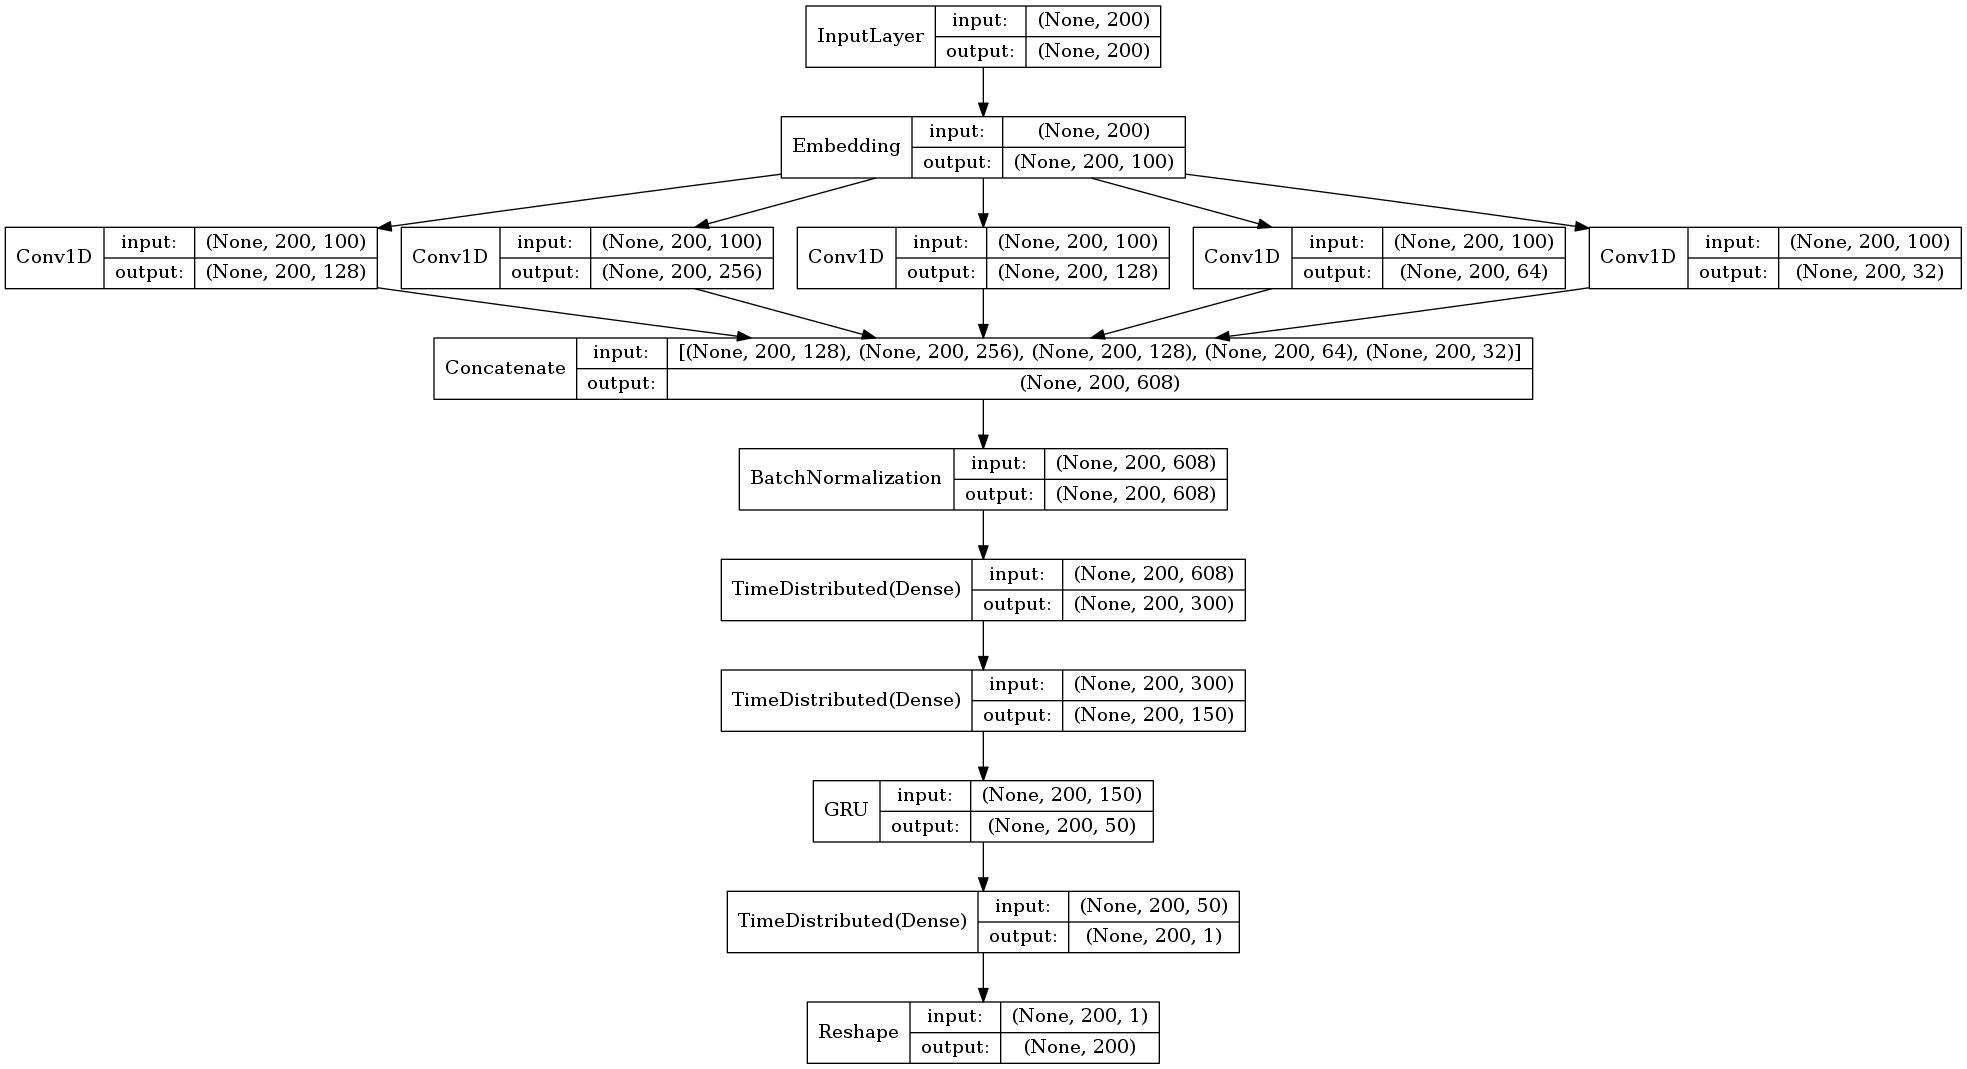

In [ ]:
import pandas as pd
news_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ST_Lecture_Note/naver_news.csv")

In [ ]:
news_df.head()

,title
0,"현대차, 전기차 미국서 직접 생산…8조 투자"
1,"비트코인 폭락 초래한 머스크 또 트윗 ""에너지 소모 미쳤다"""
2,"[속보] 뉴욕증시, 상승 출발…애플·아마존·MS 강세"
3,인플레이션 우려 속 뉴욕증시 상승 출발
4,"국회 찍고 방미, 재계 대변에 사업까지… 최태원의 '광폭 행보'"


In [ ]:
from pykospacing import Spacing
spacing = Spacing()
news_df['title_n']=news_df['title'].apply(lambda x: spacing(x))

In [ ]:
# 숫자 제거
import re
p=re.compile("[0-9]+")
news_df['title_n']=news_df['title_n'].apply(lambda x: p.sub(" ",x))

In [ ]:
# 문장부호, 특수문자 제거
p=re.compile("\W+")
news_df['title_n']=news_df['title_n'].apply(lambda x: p.sub(" ",x))

In [ ]:
!pip install konlpy

In [ ]:
# 명사만 추출
from konlpy.tag import Okt
okt=Okt()
news_df['title_n']=news_df['title_n'].apply(lambda x: okt.nouns(x))

In [ ]:
news_df.head()

,title,title_n
0,"현대차, 전기차 미국서 직접 생산…8조 투자","[현대차, 전기차, 미국, 직접, 생산, 조, 투자]"
1,"비트코인 폭락 초래한 머스크 또 트윗 ""에너지 소모 미쳤다""","[비트코인, 폭락, 초래, 머스크, 또, 트윗, 에너지, 소모]"
2,"[속보] 뉴욕증시, 상승 출발…애플·아마존·MS 강세","[속보, 뉴욕증시, 상승, 출발, 애플, 아마존, 강세]"
3,인플레이션 우려 속 뉴욕증시 상승 출발,"[인플레이션, 우려, 속, 뉴욕증시, 상승, 출발]"
4,"국회 찍고 방미, 재계 대변에 사업까지… 최태원의 '광폭 행보'","[국회, 방미, 재계, 대변, 사업, 최태원, 광폭, 행보]"


In [ ]:
# Stop word 제거
def rem_n_stopwords(sentence):
    stopwords=['기사','동영상','조','전','만','중','월','명','위', '억','억원','액','연','년','이','거','것','저','또','도','나','더','그','일','말','제','수','안','줄','게','좀','듯','님','점','등','고']
    sent_stop=[]
    for token in sentence:
        if token not in stopwords:
            sent_stop.append(token)
    return(sent_stop)

In [ ]:
news_df['title_n']=news_df['title_n'].apply(lambda x: rem_n_stopwords(x))

In [ ]:
news_df.to_csv('naver_news_result.csv',index=False, encoding='utf-8-sig')

In [ ]:
# 단어 빈도
total_word=[]
for i in range(len(news_df)):
    total_word.extend(news_df.loc[i,"title_n"])

pd.Series(total_word).value_counts().head(15)

반도체    85
투자     43
삼성     43
전자     40
분기     31
기업     31
지원     30
전략     28
현대차    23
생산     22
머스크    22
공포     21
증시     21
종합     20
인플레    19
dtype: int64

In [ ]:
pd.Series(news_df.loc[0,"title_n"]).value_counts().head()

현대차    1
전기차    1
미국     1
직접     1
생산     1
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform

In [ ]:
plt.rc('font', family='NanumBarunGothic')

<Axes: >

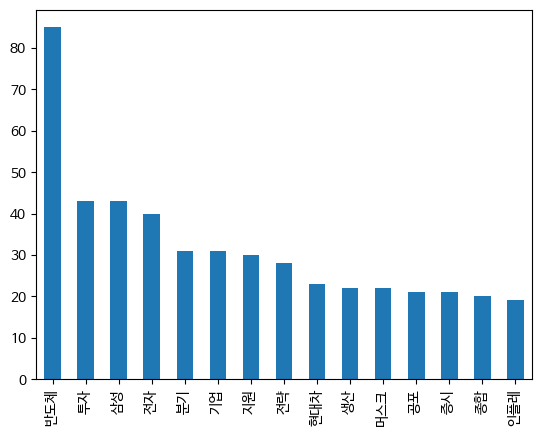

In [ ]:
pd.Series(total_word).value_counts().head(15).plot(kind='bar')

<Axes: >

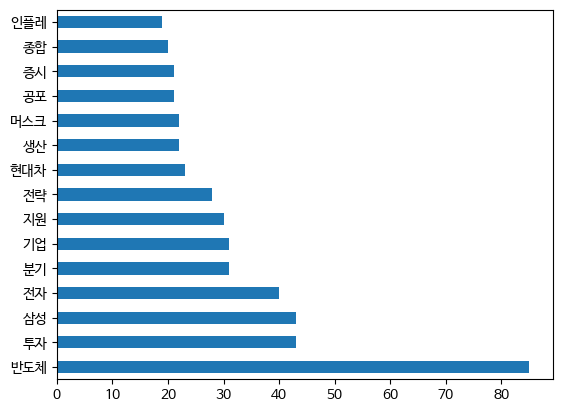

In [ ]:
pd.Series(total_word).value_counts().head(15).plot(kind='barh')

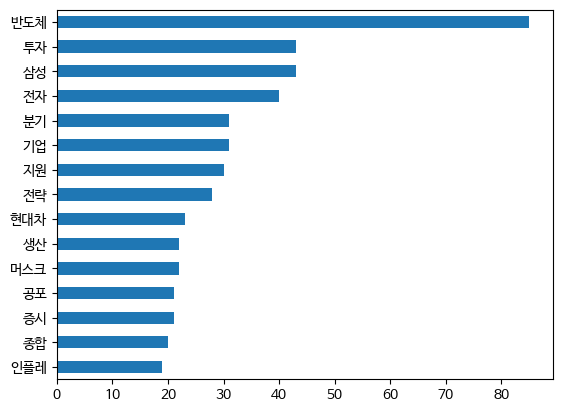

In [ ]:
pd.Series(total_word).value_counts().head(15).plot(kind='barh').invert_yaxis()

In [ ]:
!pip install wordcloud

In [ ]:
font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

In [ ]:
from wordcloud import WordCloud

(-0.5, 799.5, 599.5, -0.5)

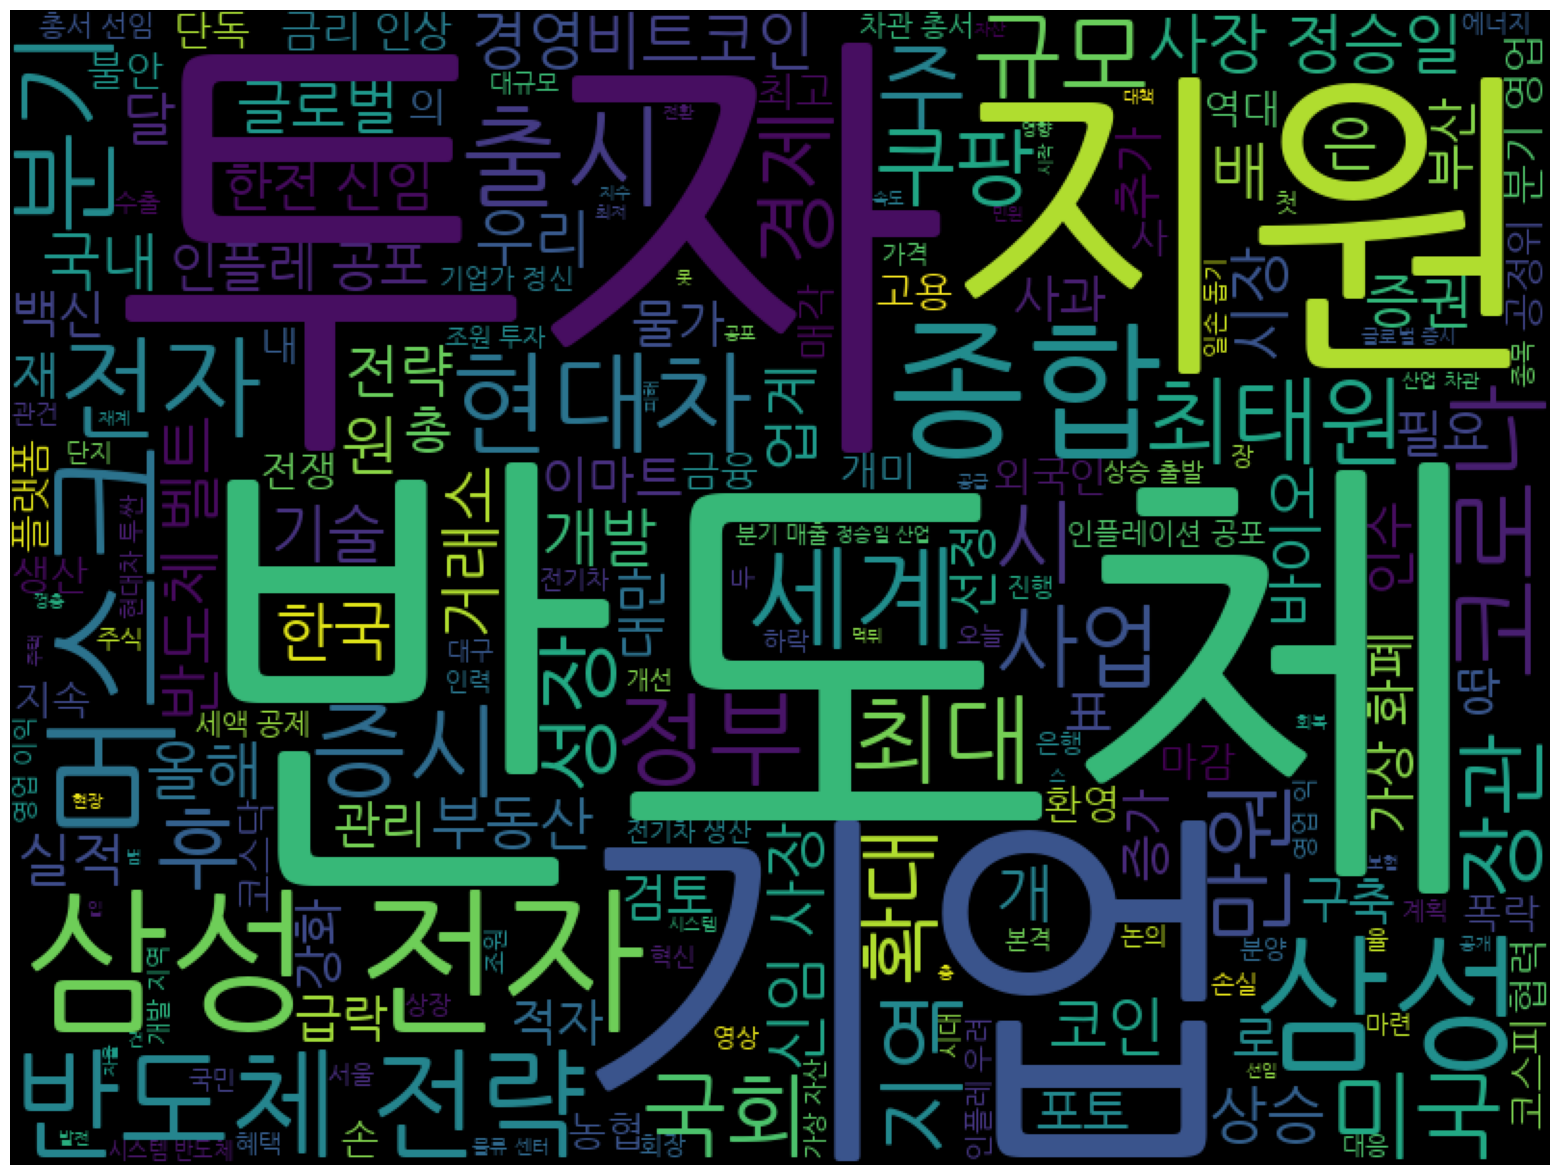

In [ ]:
cloud = WordCloud(font_path=font_path,width=800, height=600).generate(" ".join(total_word))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

# 토픽 모델링

In [ ]:
# Topic Modeling
from gensim import corpora
dictionary = corpora.Dictionary(news_df['title_n'])
corpus = [dictionary.doc2bow(text) for text in news_df['title_n']]
print(corpus[1]) # 수행된 결과에서 두번째 뉴스 출력. 첫번째 문서의 인덱스는 0

[(6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]
생산


2323

In [ ]:
print(dictionary[1])
len(dictionary)

생산


2323

In [ ]:
import gensim
NUM_TOPICS = 10 #10개의 토픽, k=10
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.017*"가상" + 0.016*"머스크" + 0.012*"화폐" + 0.010*"중단" + 0.010*"비트코인"')
(1, '0.012*"만원" + 0.012*"최태원" + 0.012*"배" + 0.011*"파운드리" + 0.009*"회장"')
(2, '0.016*"반도체" + 0.016*"전자" + 0.012*"최대" + 0.009*"투자" + 0.009*"공제"')
(3, '0.055*"반도체" + 0.032*"투자" + 0.025*"삼성" + 0.020*"현대차" + 0.020*"지원"')
(4, '0.014*"증시" + 0.013*"머스크" + 0.013*"공포" + 0.008*"비트코인" + 0.008*"분기"')
(5, '0.010*"성장" + 0.010*"일손" + 0.009*"로" + 0.007*"농촌" + 0.007*"돕기"')
(6, '0.013*"곳" + 0.013*"한화" + 0.010*"기업" + 0.010*"분기" + 0.007*"신규"')
(7, '0.015*"반도체" + 0.012*"개발" + 0.010*"지역" + 0.007*"출발" + 0.007*"세무조사"')
(8, '0.010*"기업" + 0.009*"인플레" + 0.008*"문재인" + 0.008*"개" + 0.008*"대통령"')
(9, '0.018*"사장" + 0.018*"차관" + 0.015*"한전" + 0.015*"선임" + 0.015*"정승일"')


In [ ]:
print(ldamodel.print_topics())

[(0, '0.017*"가상" + 0.016*"머스크" + 0.012*"화폐" + 0.010*"중단" + 0.010*"비트코인" + 0.009*"급락" + 0.008*"자산" + 0.006*"결제" + 0.006*"상장" + 0.006*"방문"'), (1, '0.012*"만원" + 0.012*"최태원" + 0.012*"배" + 0.011*"파운드리" + 0.009*"회장" + 0.009*"영업" + 0.009*"분기" + 0.008*"적자" + 0.007*"익" + 0.007*"하이닉스"'), (2, '0.016*"반도체" + 0.016*"전자" + 0.012*"최대" + 0.009*"투자" + 0.009*"공제" + 0.008*"세계" + 0.008*"삼성" + 0.008*"금리" + 0.007*"세액" + 0.007*"벨트"'), (3, '0.055*"반도체" + 0.032*"투자" + 0.025*"삼성" + 0.020*"현대차" + 0.020*"지원" + 0.017*"전략" + 0.017*"생산" + 0.015*"전자" + 0.009*"전기차" + 0.007*"조원"'), (4, '0.014*"증시" + 0.013*"머스크" + 0.013*"공포" + 0.008*"비트코인" + 0.008*"분기" + 0.008*"규모" + 0.006*"글로벌" + 0.006*"인플레이션" + 0.006*"세계" + 0.005*"거래소"'), (5, '0.010*"성장" + 0.010*"일손" + 0.009*"로" + 0.007*"농촌" + 0.007*"돕기" + 0.007*"상향" + 0.007*"기업가" + 0.007*"정신" + 0.007*"코로나" + 0.007*"국회"'), (6, '0.013*"곳" + 0.013*"한화" + 0.010*"기업" + 0.010*"분기" + 0.007*"신규" + 0.007*"경영" + 0.007*"순이익" + 0.007*"익" + 0.006*"착공" + 0.006*"계획"'), (7, '0.015*"반도체" + 0.012*"개발"

In [ ]:
# 문서별 토픽보기
for i, topic_list in enumerate(ldamodel[corpus]):
    if i==5:
        break
    print(i,'번째 문서의 topic 비율은',topic_list)

0 번째 문서의 topic 비율은 [(0, 0.0142863775), (1, 0.0142868245), (2, 0.014287125), (3, 0.8714206), (4, 0.014286879), (5, 0.014286861), (6, 0.014286276), (7, 0.014286276), (8, 0.014286303), (9, 0.014286429)]
1 번째 문서의 topic 비율은 [(0, 0.012503672), (1, 0.012500917), (2, 0.012501847), (3, 0.012501338), (4, 0.8874859), (5, 0.012500917), (6, 0.012501004), (7, 0.012501012), (8, 0.012501043), (9, 0.012502378)]
2 번째 문서의 topic 비율은 [(0, 0.012502126), (1, 0.012502271), (2, 0.012502262), (3, 0.012502123), (4, 0.012502744), (5, 0.012502125), (6, 0.012502318), (7, 0.637586), (8, 0.2623959), (9, 0.012502124)]
3 번째 문서의 topic 비율은 [(0, 0.014290601), (1, 0.014286907), (2, 0.014286884), (3, 0.014286572), (4, 0.014292482), (5, 0.014288685), (6, 0.014289099), (7, 0.8714047), (8, 0.014286542), (9, 0.014287513)]
4 번째 문서의 topic 비율은 [(0, 0.011112109), (1, 0.8999816), (2, 0.011112109), (3, 0.011112458), (4, 0.011112109), (5, 0.011116529), (6, 0.011112792), (7, 0.011112139), (8, 0.011113827), (9, 0.0111142825)]


In [ ]:
doc=ldamodel[corpus][0]
print(doc)

[(0, 0.014286378), (1, 0.014286823), (2, 0.014287126), (3, 0.8714206), (4, 0.014286879), (5, 0.014286862), (6, 0.014286277), (7, 0.014286277), (8, 0.014286304), (9, 0.01428643)]
[(3, 0.8714206), (2, 0.014287126), (4, 0.014286879), (5, 0.014286862), (1, 0.014286823), (9, 0.01428643), (0, 0.014286378), (8, 0.014286304), (6, 0.014286277), (7, 0.014286277)]


In [ ]:
doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
print(doc)

[(3, 0.8714206), (2, 0.014287126), (4, 0.014286879), (5, 0.014286862), (1, 0.014286823), (9, 0.01428643), (0, 0.014286378), (8, 0.014286304), (6, 0.014286277), (7, 0.014286277)]


In [ ]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table=pd.DataFrame()
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc=topic_list
        doc=sorted(doc,key=lambda x: (x[1]),reverse=True)
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

In [ ]:
topictable = make_topictable_per_doc(ldamodel, corpus)

<ipython-input-40-f84ea65a61d8>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
<ipython-input-40-f84ea65a61d8>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
<ipython-input-40-f84ea65a61d8>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
<ipython-input-40-f84ea65a61d8>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

In [ ]:
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,3,0.8714,"[(0, 0.014286378), (1, 0.0142868245), (2, 0.01..."
1,1,4,0.8875,"[(0, 0.01250536), (1, 0.012500916), (2, 0.0125..."
2,2,7,0.6376,"[(0, 0.012502126), (1, 0.012502271), (2, 0.012..."
3,3,7,0.8714,"[(0, 0.014290603), (1, 0.014286907), (2, 0.014..."
4,4,1,0.9000,"[(0, 0.011112109), (1, 0.8999824), (2, 0.01111..."
5,5,2,0.9182,"[(2, 0.9181688)]"
6,6,0,0.9000,"[(0, 0.89998144), (1, 0.01111288), (2, 0.01111..."
7,7,3,0.5788,"[(0, 0.0142875705), (1, 0.014287563), (2, 0.01..."
8,8,3,0.9000,"[(0, 0.0111137265), (1, 0.011112656), (2, 0.01..."
9,9,7,0.9182,"[(7, 0.91816646)]"


In [ ]:
import gensim
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
coherence_values=[]
for i in range(2,30):
    ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model_lda =CoherenceModel(model=ldamodel, texts=news_df['title_n'], dictionary = dictionary,topn=10)
    coherence_lda=coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


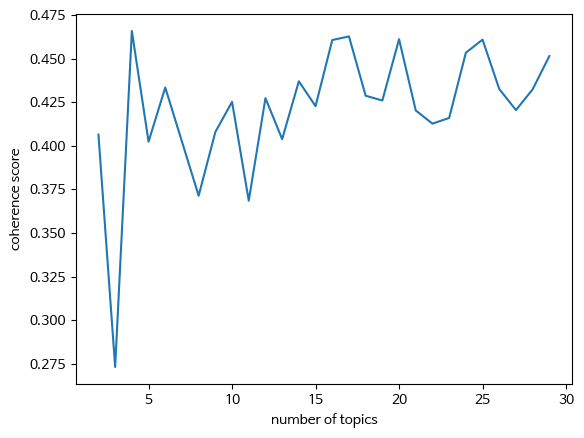

In [ ]:
x=range(2,30)
plt.plot(x,coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show() #number of topics= 12